<a href="https://colab.research.google.com/github/kojiyam/WiFi-Sensing/blob/main/251016_PicoScenesToolbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

左のフォルダアイコンをクリックし，`PicoscenesToolbox`フォルダに，.csiファイルをアップロードすれば，それを読み込むこともできる

In [1]:
# PicoScenes Python Toolboxインストール (Google Colabでは毎起動毎に必要)
!git clone https://github.com/Herrtian/PicoscenesToolbox.git --recursive
%cd PicoscenesToolbox
!pip install -e .

Cloning into 'PicoscenesToolbox'...
remote: Enumerating objects: 202, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 202 (delta 29), reused 38 (delta 13), pack-reused 138 (from 1)
Receiving objects: 100% (202/202), 33.93 MiB | 22.21 MiB/s, done.
Resolving deltas: 100% (95/95), done.
Submodule 'rxs_parsing_core' (https://github.com/wifisensing/RXS-Parsing-Core.git) registered for path 'rxs_parsing_core'
Cloning into '/content/PicoscenesToolbox/rxs_parsing_core'...
remote: Enumerating objects: 3048, done.        
remote: Counting objects: 100% (3048/3048), done.        
remote: Compressing objects: 100% (963/963), done.        
remote: Total 3048 (delta 2145), reused 2986 (delta 2084), pack-reused 0 (from 0)        
Receiving objects: 100% (3048/3048), 625.75 KiB | 6.95 MiB/s, done.
Resolving deltas: 100% (2145/2145), done.
Submodule path 'rxs_parsing_core': checked out '75b099d9841e539e8c3c50151e1442b5f4bd5382'
/content

In [24]:
%pwd

'/content/PicoscenesToolbox'

In [3]:
import picoscenes

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
# 自分で.csiファイルをアップロードして指定してもよい
frames = picoscenes.Picoscenes("rx_by_usrpN210.csi") # Toolboxに含まれるサンプル
# frames = picoscenes.Picoscenes("rx_4_250105_163200.csi")

In [36]:
frames.raw[0].get('RxSBasic')

{'deviceType': 4660,
 'timestamp': 1617379763885693382,
 'systemns': 0,
 'centerFreq': 2417,
 'controlFreq': 2417,
 'CBW': 20,
 'packetFormat': 0,
 'packetCBW': 20,
 'GI': 800,
 'MCS': 4,
 'numSTS': 1,
 'numESS': 0,
 'numRx': 1,
 'noiseFloor': 0,
 'rssi': 0,
 'rssi1': 0,
 'rssi2': 0,
 'rssi3': 0,
 'rssi4': 0,
 'rssi5': 0,
 'rssi6': 0,
 'rssi7': 0,
 'rssi8': 0}

In [37]:
def flatten_dict(d, parent_key='', sep='.'):
    items = {}
    for k, v in d.items():
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.update(flatten_dict(v, new_key, sep=sep))
        else:
            items[new_key] = v
    return items

In [38]:
flat_frames = [flatten_dict(f) for f in frames.raw]

In [39]:
df = pd.DataFrame(flat_frames)

In [41]:
numTones = df['CSI.numTones'][0] # サブキャリア数
SubcarrierBandwidth = df['CSI.SubcarrierBandwidth'][0]
numTx = df['CSI.numTx'][0]
numRx = df['CSI.numRx'][0]
print(numTones,numTx,numRx)

53 1 1


In [42]:
h = df['CSI.CSI']

In [43]:
np.array(h[0]).shape

(53,)

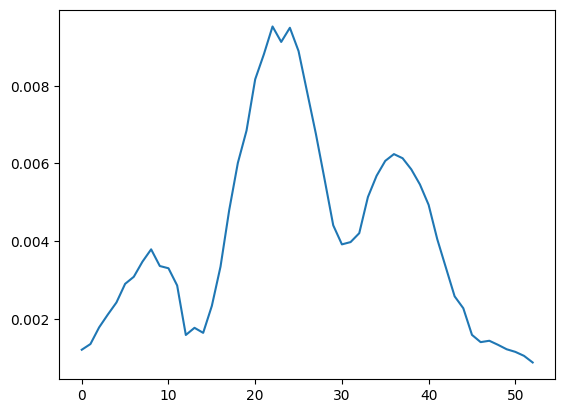

In [44]:
plt.plot(np.abs(h[0]))

In [47]:
# rx_by_usrpN210.csi の場合は，以下は実行できない
reshaped_h = [np.reshape(h[t], (1, numRx, numTx, numTones)) for t in range(h.shape[0])]
H = np.concatenate(reshaped_h, axis=0)

ValueError: cannot reshape array of size 57 into shape (1,1,1,53)

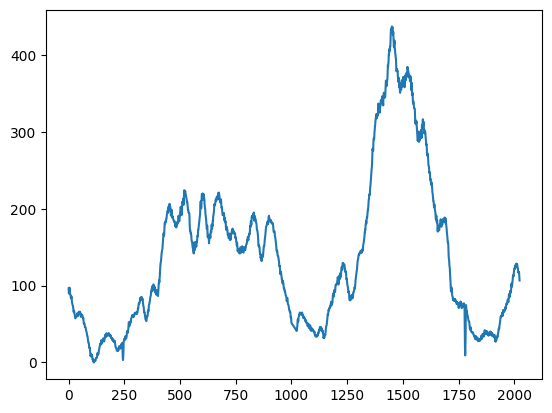

In [47]:
plt.plot(np.abs(H[0,0,0,:]))